## Загрузка данных

In [1]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Download latest version
path = kagglehub.dataset_download("gauravtopre/bank-customer-churn-dataset")

print("Path to dataset files:", path)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/mishnya/.cache/kagglehub/datasets/gauravtopre/bank-customer-churn-dataset/versions/1


In [2]:
# pd.set_option('display.max_colwidth', None)  # Без ограничения на ширину колонок
# pd.set_option('display.width', 400)
if os.path.isdir(path):
    # Найдите CSV-файл в папке
    files = os.listdir(path)
    csv_file = [f for f in files if f.endswith('.csv')][0]  # Берем первый CSV
    full_path = os.path.join(path, csv_file)
else:
    full_path = path  # Если это уже путь к файлу

# Чтение CSV в DataFrame
df = pd.read_csv(full_path)
# styled_df = df.style.set_properties(**{'text-align': 'center'})
# Просмотр первых строк
df.head(8)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1


## Анализ

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Создаем новый DataFrame с преобразованиями
renamed_df = df.copy()  # Копируем исходный DataFrame, чтобы не изменять оригинал

# 1. Перевод стран (country)
country_mapping = {
    'Spain': 'Испания',
    'France': 'Франция',
    'Germany': 'Германия'
}
renamed_df['country'] = renamed_df['country'].map(country_mapping)

# 2. Перевод пола (gender)
gender_mapping = {
    'Male': 'Мужской',
    'Female': 'Женский'
}
renamed_df['gender'] = renamed_df['gender'].map(gender_mapping)

# 3. Перевод credit_card (0 - Нет, 1 - Есть)
renamed_df['credit_card'] = renamed_df['credit_card'].map({0: 'Нет', 1: 'Есть'})

# 4. Перевод active_member (0 - Нет, 1 - Да)
renamed_df['active_member'] = renamed_df['active_member'].map({0: 'Нет', 1: 'Да'})

# 5. Округление balance до целого числа
renamed_df['balance'] = renamed_df['balance'].round().astype(int)
# 7. Округление estimated_salary до целого числа
renamed_df['estimated_salary'] = renamed_df['estimated_salary'].round().astype(int)

# 6. Перевод churn (0 - Остался, 1 - Покинул)
renamed_df['churn'] = renamed_df['churn'].map({0: 'Остался', 1: 'Покинул'})

renamed_df = renamed_df.rename(columns={'customer_id': 'id клиента', 'credit_score': 'кредитный рейтинг', 'country': 'Страна', 'gender': 'Пол', 'country': 'Страна',
                                'age': 'Возвраст', 'tenure': 'сколько лет имеется счёт', 'balance': 'баланс', 'products_number': 'количество продуктов',
                                'credit_card': 'наличие кред.к.', 'active_member': 'Является ли членом банка?', 'estimated_salary': 'Заработная плата', 'churn': 'Статус оттока'})
renamed_df = renamed_df.head(10).style.set_properties(**{'text-align': 'center'})
display(renamed_df)


,id клиента,кредитный рейтинг,Страна,Пол,Возвраст,сколько лет имеется счёт,баланс,количество продуктов,наличие кред.к.,Является ли членом банка?,Заработная плата,Статус оттока
0,15634602,619,Франция,Женский,42,2,0,1,Есть,Да,101349,Покинул
1,15647311,608,Испания,Женский,41,1,83808,1,Нет,Да,112543,Остался
2,15619304,502,Франция,Женский,42,8,159661,3,Есть,Нет,113932,Покинул
3,15701354,699,Франция,Женский,39,1,0,2,Нет,Нет,93827,Остался
4,15737888,850,Испания,Женский,43,2,125511,1,Есть,Да,79084,Остался
5,15574012,645,Испания,Мужской,44,8,113756,2,Есть,Нет,149757,Покинул
6,15592531,822,Франция,Мужской,50,7,0,2,Есть,Да,10063,Остался
7,15656148,376,Германия,Женский,29,4,115047,4,Есть,Нет,119347,Покинул
8,15792365,501,Франция,Мужской,44,4,142051,2,Нет,Да,74940,Остался
9,15592389,684,Франция,Мужской,27,2,134604,1,Есть,Да,71726,Остался


In [ ]:
comments_counts=df['churn'].value_counts()
print(comments_counts)

churn
0    7963
1    2037
Name: count, dtype: int64


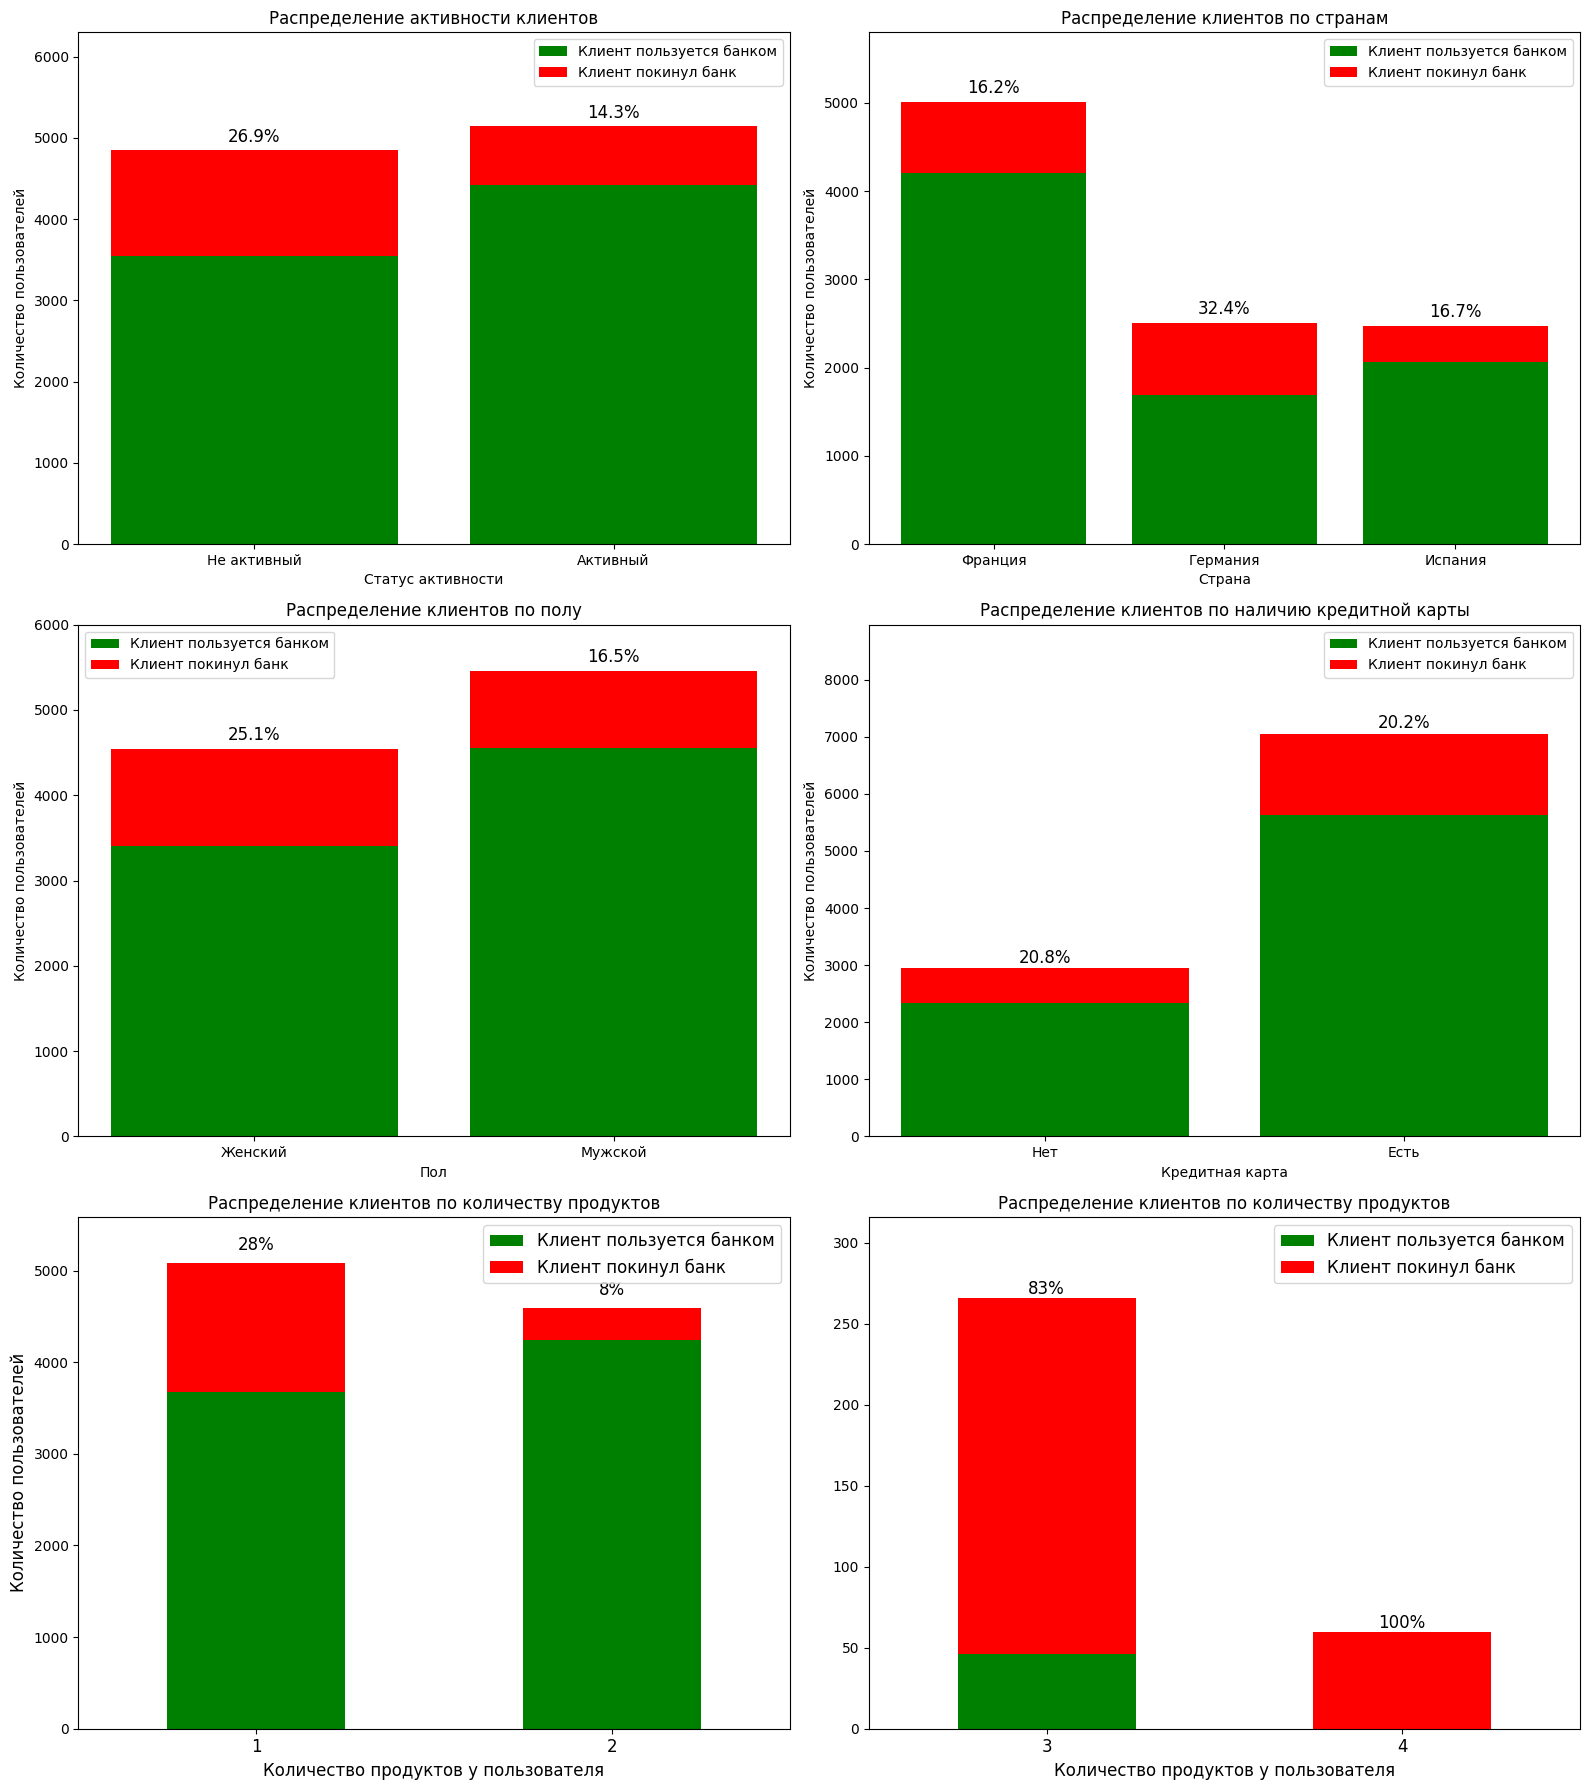

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Предполагаем, что данные уже загружены в DataFrame df
df = df.copy()

# Сводные таблицы для всех графиков
# 1. Active_member
active_summary = df.groupby('active_member')['churn'].value_counts(normalize=True).unstack() * 100
active_absolute_counts = df.groupby('active_member')['churn'].value_counts().unstack()

# 2. Country (с английскими данными, но русские подписи)
country_summary = df.groupby('country')['churn'].value_counts(normalize=True).unstack() * 100
country_absolute_counts = df.groupby('country')['churn'].value_counts().unstack()

# 3. Gender (с английскими данными, но русские подписи)
gender_summary = df.groupby('gender')['churn'].value_counts(normalize=True).unstack() * 100
gender_absolute_counts = df.groupby('gender')['churn'].value_counts().unstack()

# 4. Credit_card (с английскими данными, но русские подписи)
credit_card_summary = df.groupby('credit_card')['churn'].value_counts(normalize=True).unstack() * 100
credit_card_absolute_counts = df.groupby('credit_card')['churn'].value_counts().unstack(fill_value=0)

# Метки для осей
labels_active = ['Не активный', 'Активный']
# Маппинг английских стран на русский для подписей
country_mapping = {
    'France': 'Франция',
    'Germany': 'Германия',
    'Spain': 'Испания'
}
countries = [country_mapping[country] for country in country_summary.index]  # Русские названия стран
# Маппинг английского gender на русский
gender_mapping = {
    'Female': 'Женский',
    'Male': 'Мужской'
}
labels_gender = [gender_mapping[label] for label in ['Female', 'Male']]  # Русские названия пола
# Маппинг английских значений credit_card на русский
credit_card_mapping = {
    0: 'Нет',
    1: 'Есть'
}
labels_credit_card = [credit_card_mapping[label] for label in [0, 1]]  # Русские названия для credit_card

# Создаем два подмножества данных для продуктов
df_12 = df[df['products_number'].isin([1, 2])]  # Данные для 1 и 2
df_34 = df[df['products_number'].isin([3, 4])]  # Данные для 3 и 4

# Сводные таблицы для продуктов
products_summary_12 = df_12.groupby('products_number')['churn'].value_counts(normalize=True).unstack() * 100
products_absolute_counts_12 = df_12.groupby('products_number')['churn'].value_counts().unstack(fill_value=0)

products_summary_34 = df_34.groupby('products_number')['churn'].value_counts(normalize=True).unstack() * 100
products_absolute_counts_34 = df_34.groupby('products_number')['churn'].value_counts().unstack(fill_value=0)

# Создаем полотно с 3 строками и 2 столбцами (всего 6 графиков)
fig, axes = plt.subplots(3, 2, figsize=(16, 18))  # 3 строки, 2 столбца, увеличенная высота для трех строк
fig.subplots_adjust(hspace=0.6, wspace=0.4)  # Расстояние между графиками

# 1. График по активности (active_member)
axes[0, 0].bar(labels_active, active_absolute_counts[0], label='Клиент пользуется банком', color='green')
axes[0, 0].bar(labels_active, active_absolute_counts[1], bottom=active_absolute_counts[0], label='Клиент покинул банк', color='red')
for i, label in enumerate(labels_active):
    total = active_absolute_counts.iloc[i].sum()
    churn_percent = active_summary.loc[i, 1]
    axes[0, 0].text(i, total + 100, f"{churn_percent:.1f}%", ha='center', fontsize=12)
axes[0, 0].set_xlabel('Статус активности')
axes[0, 0].set_ylabel('Количество пользователей')
axes[0, 0].set_title('Распределение активности клиентов')
axes[0, 0].set_ylim(0, 6300)
axes[0, 0].legend()

# 2. График по странам (country) с русскими названиями стран
axes[0, 1].bar(countries, country_absolute_counts[0], label='Клиент пользуется банком', color='green')
axes[0, 1].bar(countries, country_absolute_counts[1], bottom=country_absolute_counts[0], label='Клиент покинул банк', color='red')
for i, country in enumerate(country_summary.index):  # Используем индексы для доступа к данным
    total = country_absolute_counts.iloc[i].sum()
    churn_percent = country_summary.loc[country, 1]
    axes[0, 1].text(i, total + 100, f"{churn_percent:.1f}%", ha='center', fontsize=12)
axes[0, 1].set_xlabel('Страна')
axes[0, 1].set_ylabel('Количество пользователей')
axes[0, 1].set_title('Распределение клиентов по странам')
axes[0, 1].set_ylim(0, 5800)
axes[0, 1].legend()

# 3. График по полу (gender) с русскими подписями
axes[1, 0].bar(labels_gender, gender_absolute_counts[0], label='Клиент пользуется банком', color='green')
axes[1, 0].bar(labels_gender, gender_absolute_counts[1], bottom=gender_absolute_counts[0], label='Клиент покинул банк', color='red')
for i, eng_label in enumerate(['Female', 'Male']):  # Используем английские значения для данных
    total = gender_absolute_counts.loc[eng_label].sum()
    churn_percent = gender_summary.loc[eng_label, 1] if 1 in gender_summary.columns and not pd.isna(gender_summary.loc[eng_label, 1]) else 0
    axes[1, 0].text(i, total + 100, f"{churn_percent:.1f}%", ha='center', fontsize=12)
axes[1, 0].set_xlabel('Пол')
axes[1, 0].set_ylabel('Количество пользователей')
axes[1, 0].set_title('Распределение клиентов по полу')
axes[1, 0].set_ylim(0, 6000)
axes[1, 0].legend()

# 4. График по наличию кредитной карты (credit_card) с русскими подписями
axes[1, 1].bar(labels_credit_card, credit_card_absolute_counts[0], label='Клиент пользуется банком', color='green')
axes[1, 1].bar(labels_credit_card, credit_card_absolute_counts[1], bottom=credit_card_absolute_counts[0], label='Клиент покинул банк', color='red')
for i, eng_label in enumerate([0, 1]):  # Используем английские значения (0 и 1) для данных
    total = credit_card_absolute_counts.loc[eng_label].sum()
    churn_percent = credit_card_summary.loc[eng_label, 1] if 1 in credit_card_summary.columns and not pd.isna(credit_card_summary.loc[eng_label, 1]) else 0
    axes[1, 1].text(i, total + 100, f"{churn_percent:.1f}%", ha='center', fontsize=12)
axes[1, 1].set_xlabel('Кредитная карта')
axes[1, 1].set_ylabel('Количество пользователей')
axes[1, 1].set_title('Распределение клиентов по наличию кредитной карты')
axes[1, 1].set_ylim(0, max(credit_card_absolute_counts.sum()) + 1000)
axes[1, 1].legend()

# 5. График для products_number = 1 и 2
products_churn_counts_12 = df_12.groupby(['products_number', 'churn']).size().unstack(fill_value=0)
products_churn_counts_12.plot(kind='bar', stacked=True, color=['green', 'red'], ax=axes[2, 0])

axes[2, 0].set_xticklabels(products_churn_counts_12.index, rotation=0, fontsize=12)
axes[2, 0].set_xlabel('Количество продуктов у пользователя', fontsize=12)
axes[2, 0].set_ylabel('Количество пользователей', fontsize=12)
axes[2, 0].set_title('Распределение клиентов по количеству продуктов')
# Добавляем проценты оттока (churn = 1) над столбцами для 1 и 2
for i, products in enumerate([1, 2]):
    total = products_absolute_counts_12.loc[products].sum() if products in products_absolute_counts_12.index else 0
    churn_percent = products_summary_12.loc[products, 1] if products in products_summary_12.index and 1 in products_summary_12.columns and not pd.isna(products_summary_12.loc[products, 1]) else 0
    axes[2, 0].text(i, total + 100, f"{churn_percent:.0f}%", ha='center', va='bottom', fontsize=12, color='black')

# Устанавливаем масштаб оси Y
axes[2, 0].set_ylim(0, products_churn_counts_12.sum(axis=1).max() + 500)

# Легенда справа сверху
axes[2, 0].legend(['Клиент пользуется банком', 'Клиент покинул банк'], loc='upper right', fontsize=12)

# 6. График для products_number = 3 и 4
products_churn_counts_34 = df_34.groupby(['products_number', 'churn']).size().unstack(fill_value=0)
products_churn_counts_34.plot(kind='bar', stacked=True, color=['green', 'red'], ax=axes[2, 1])

axes[2, 1].set_xticklabels(products_churn_counts_34.index, rotation=0, fontsize=12)
axes[2, 1].set_xlabel('Количество продуктов у пользователя', fontsize=12)

# Добавляем проценты оттока (churn = 1) над столбцами для 3 и 4
for i, products in enumerate([3, 4]):
    total = products_absolute_counts_34.loc[products].sum() if products in products_absolute_counts_34.index else 0
    churn_percent = products_summary_34.loc[products, 1] if products in products_summary_34.index and 1 in products_summary_34.columns and not pd.isna(products_summary_34.loc[products, 1]) else 0
    axes[2, 1].text(i, total, f"{churn_percent:.0f}%", ha='center', va='bottom', fontsize=12, color='black')

# Устанавливаем масштаб оси Y
axes[2, 1].set_ylim(0, products_churn_counts_34.sum(axis=1).max() + 50)
axes[2, 1].set_title('Распределение клиентов по количеству продуктов')
# Легенда справа сверху
axes[2, 1].legend(['Клиент пользуется банком', 'Клиент покинул банк'], loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()

## Кореляция

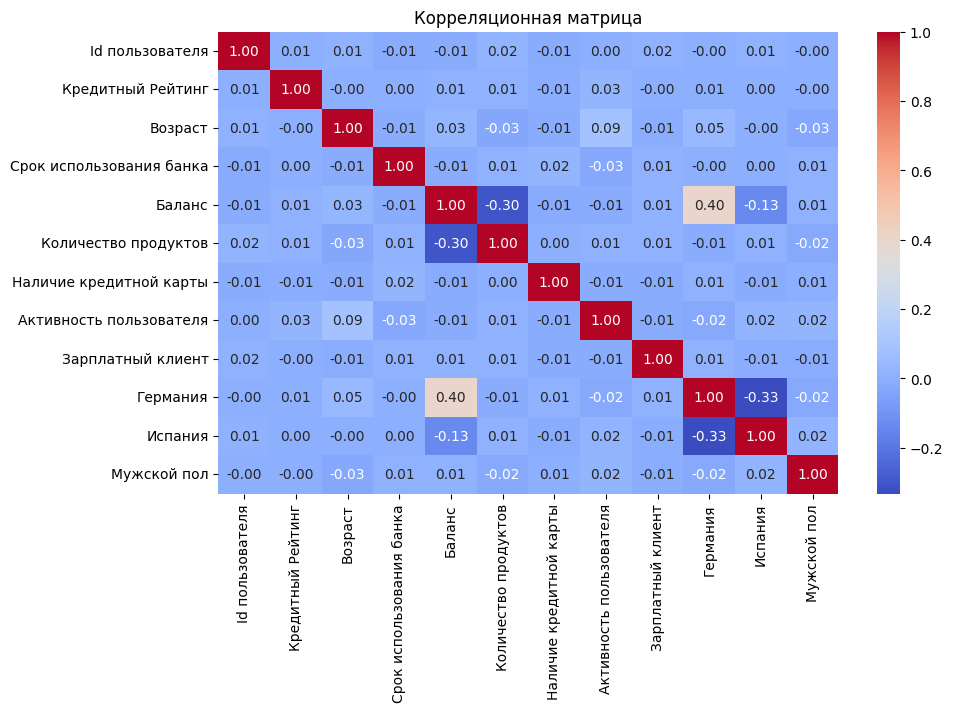

In [ ]:
# One-Hot Encoding для 'country' и 'gender' (удаляем первую категорию для избежания избыточности)
df_encoded = pd.get_dummies(df, columns=['country', 'gender'], drop_first=True)

# Считаем корреляцию
corr_matrix = df_encoded.corr()

# Убираем 'churn' из индексов и колонок
corr_matrix = corr_matrix.drop(columns=['churn'], index=['churn'])

# Оставляем только нужные столбцы (из One-Hot Encoding оставляем по n-1 категории)
columns_ru = ['Id пользователя', 'Кредитный Рейтинг', 'Возраст', 'Срок использования банка', 'Баланс',
              'Количество продуктов', 'Наличие кредитной карты', 'Активность пользователя', 'Зарплатный клиент',
              'Германия', 'Испания', 'Мужской пол']  # Франция и Женский пол убраны

# Обновляем названия столбцов для русскоязычного отображения
corr_matrix_ru = corr_matrix.copy()
corr_matrix_ru.columns = columns_ru
corr_matrix_ru.index = columns_ru

# Визуализируем
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_ru, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()

In [ ]:
df_encoded.corr()['churn'].sort_values(ascending=False)

,churn
churn,1.000000
age,0.285323
country_Germany,0.173488
balance,0.118533
estimated_salary,0.012097
customer_id,-0.006248
credit_card,-0.007138
tenure,-0.014001
credit_score,-0.027094
products_number,-0.047820


# Распределения

##Возраст

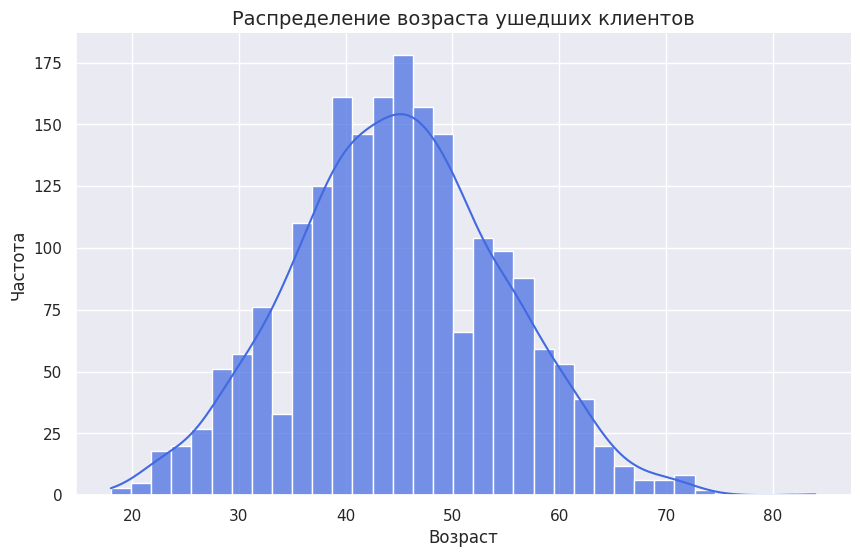

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_min = df.copy()

# Фильтруем только ушедших клиентов
df_churned = df_min[df_min["churn"] == 1]

# Строим гистограмму
plt.figure(figsize=(10, 6))
sns.histplot(df_churned["age"], bins=35, kde=True, color="royalblue", alpha=0.7)

# Настроим стиль
plt.xlabel("Возраст", fontsize=12)
plt.ylabel("Частота", fontsize=12)
plt.title("Распределение возраста ушедших клиентов", fontsize=14)
sns.despine()  # Убираем лишние границы

# Показываем график
plt.show()


In [ ]:
df['age'].min()

18

<ipython-input-36-b1baf0e9dca2>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_summary = data_subset.groupby('age_group')['churn'].value_counts(normalize=True).unstack() * 100
<ipython-input-36-b1baf0e9dca2>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_absolute_counts = data_subset.groupby('age_group')['churn'].value_counts().unstack()


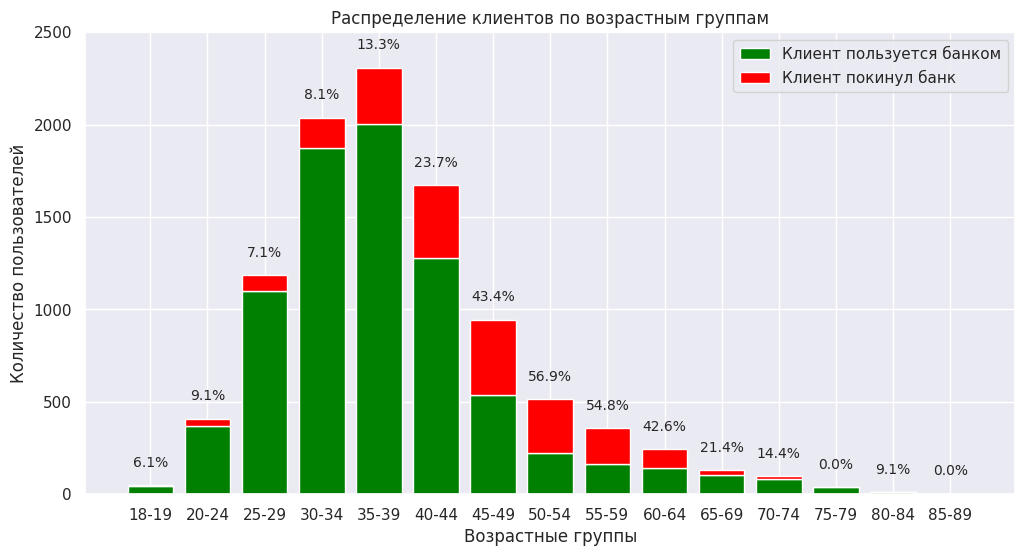

In [ ]:
data_subset = df.copy()
# Создаем возрастные группы

bins = [18] + [i for i in range(20,92,5)]
data_subset.loc[:, 'age_group'] = pd.cut(data_subset['age'], bins, right=False)

# Сводная таблица по возрастным группам
age_summary = data_subset.groupby('age_group')['churn'].value_counts(normalize=True).unstack() * 100
age_absolute_counts = data_subset.groupby('age_group')['churn'].value_counts().unstack()

age_groups = [f'{int(interval.left)}-{int(interval.right)-1}' for interval in age_summary.index]

# Столбчатая диаграмма
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(age_groups, age_absolute_counts[0], label='Клиент пользуется банком', color='green')
ax.bar(age_groups, age_absolute_counts[1], bottom=age_absolute_counts[0], label='Клиент покинул банк', color='red')

# Добавление процентов
for i, group in enumerate(age_groups):
    total = age_absolute_counts.iloc[i].sum()
    churn_percent = age_summary.iloc[i, 1]
    ax.text(i, total + 100, f"{churn_percent:.1f}%", ha='center', fontsize=10)

ax.set_xlabel('Возрастные группы')
ax.set_ylabel('Количество пользователей')
ax.set_title('Распределение клиентов по возрастным группам')
ax.set_ylim(0,2500)
ax.legend()
plt.show()



In [ ]:
filtered_data = df[(df['age'] >= 75) & (df['age'] <= 92)]
print(len(filtered_data))

54


In [ ]:
display(filtered_data)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
85,15805254,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
252,15793726,681,France,Female,79,0,0.00,2,0,1,170968.99,0
310,15712287,652,France,Female,80,4,0.00,2,1,1,188603.07,0
371,15774696,640,Germany,Female,75,1,106307.91,2,0,1,113428.77,0
766,15810864,700,France,Female,82,2,0.00,2,0,1,182055.36,0
1205,15724307,780,France,Male,76,10,121313.88,1,0,1,64872.33,0
1614,15646037,641,France,Male,77,9,0.00,3,1,1,81514.06,0
2164,15794479,767,Spain,Male,77,8,149083.70,1,1,1,190146.83,0
2458,15813303,513,Spain,Male,88,10,0.00,2,1,1,52952.24,0
2855,15693203,710,Spain,Female,75,5,0.00,2,1,1,9376.89,0


## Баланс

In [ ]:
print(df['balance'].describe())


count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: balance, dtype: float64


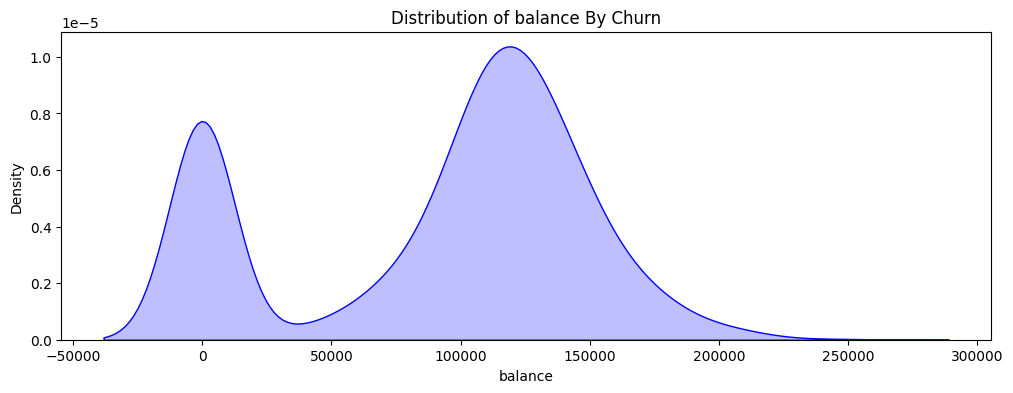

In [ ]:
plt.figure(figsize=(12, 4))

sns.kdeplot(df['balance'][df['churn'] == 1], color='blue', fill=True)
plt.title('Distribution of balance By Churn')

plt.show()

In [ ]:
import pandas as pd

# Предполагаем, что данные уже загружены в DataFrame df
df = df.copy()

# Создаём подмножество данных для balance
df_balance = df.copy()

# Создаем группы для balance (с учётом максимального значения 250898.09 и минимального 0, 20 бинов)
bins = [0, 1, 50000, 60000, 70000, 80000, 90000, 100000, 120000, 140000, 160000, 180000, 200000, 250898.09]
df_balance.loc[:, 'balance_group'] = pd.cut(df_balance['balance'], bins, right=False, labels=[f'{int(bins[i])}-{int(bins[i+1])-1}' if i < len(bins)-2 else f'{int(bins[i])}+' for i in range(len(bins)-1)])

# Сводная таблица по группам balance
# Абсолютное количество клиентов по группам и churn
balance_absolute_counts = df_balance.groupby('balance_group')['churn'].value_counts().unstack(fill_value=0)

# Процент оттока (churn = 1) по группам
balance_summary = df_balance.groupby('balance_group')['churn'].value_counts(normalize=True).unstack() * 100

# Создаём итоговую таблицу
table_data = pd.DataFrame({
    'Группа баланса': balance_absolute_counts.index,
    'Количество человек': balance_absolute_counts.sum(axis=1),
    'Процент оттока (%)': balance_summary[1].round(1) if 1 in balance_summary.columns else 0
})


# Выводим таблицу
display(table_data)


<ipython-input-65-94c0ef95fff4>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balance_absolute_counts = df_balance.groupby('balance_group')['churn'].value_counts().unstack(fill_value=0)
<ipython-input-65-94c0ef95fff4>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balance_summary = df_balance.groupby('balance_group')['churn'].value_counts(normalize=True).unstack() * 100


,Группа баланса,Количество человек,Процент оттока (%)
balance_group,,,
0-0,0-0,3617,13.8
1-49999,1-49999,75,34.7
50000-59999,50000-59999,80,22.5
60000-69999,60000-69999,156,23.7
70000-79999,70000-79999,274,17.5
80000-89999,80000-89999,400,18.5
90000-99999,90000-99999,599,20.5
100000-119999,100000-119999,1618,27.6
120000-139999,120000-139999,1632,25.0


<ipython-input-43-c5b261763a90>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balance_summary = df_balance.groupby('balance_group')['churn'].value_counts(normalize=True).unstack() * 100
<ipython-input-43-c5b261763a90>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balance_absolute_counts = df_balance.groupby('balance_group')['churn'].value_counts().unstack(fill_value=0)


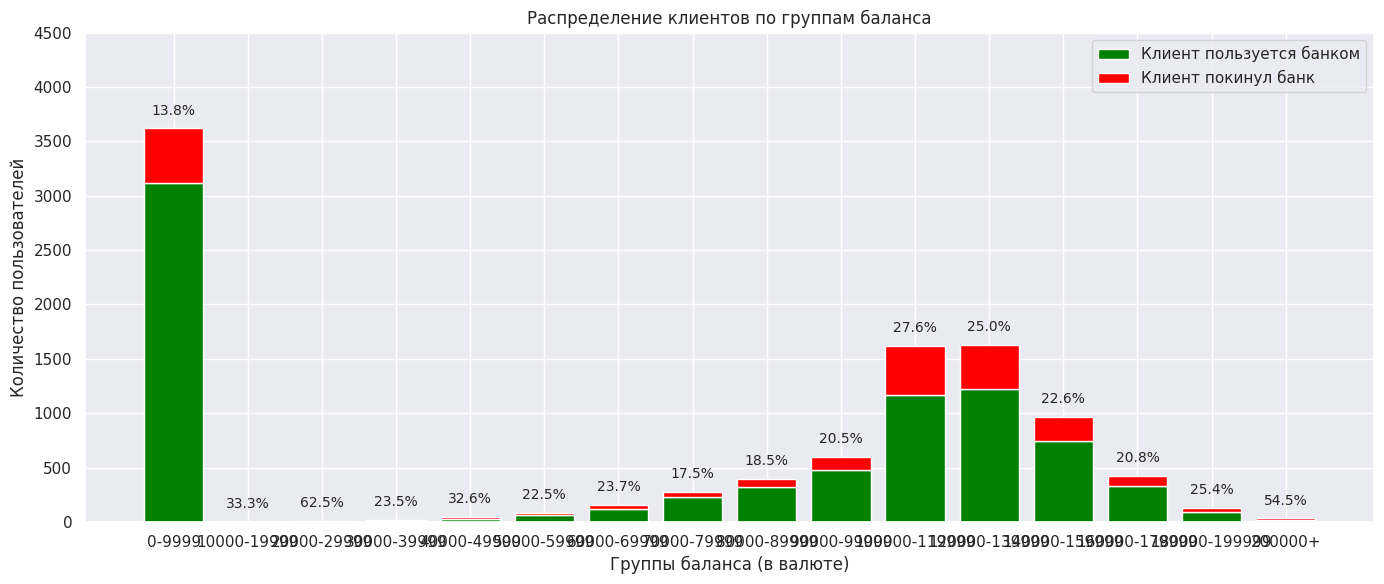

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Предполагаем, что данные уже загружены в DataFrame df
df = df.copy()

# Создаём подмножество данных для balance
df_balance = df.copy()

# Создаем группы для balance (с учётом максимального значения 250898.09 и минимального 0, 20 бинов)
bins = [0, 10000,  20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 120000, 140000, 160000, 180000, 200000, 250898.09]
df_balance.loc[:, 'balance_group'] = pd.cut(df_balance['balance'], bins, right=False, labels=[f'{int(bins[i])}-{int(bins[i+1])-1}' if i < len(bins)-2 else f'{int(bins[i])}+' for i in range(len(bins)-1)])

# Сводная таблица по группам balance
balance_summary = df_balance.groupby('balance_group')['churn'].value_counts(normalize=True).unstack() * 100
balance_absolute_counts = df_balance.groupby('balance_group')['churn'].value_counts().unstack(fill_value=0)

balance_groups = balance_summary.index.tolist()  # Используем метки бинов как группы

# Столбчатая диаграмма
fig, ax = plt.subplots(figsize=(14, 6))  # Увеличиваем ширину для 20 столбцов
ax.bar(balance_groups, balance_absolute_counts[0], label='Клиент пользуется банком', color='green')
ax.bar(balance_groups, balance_absolute_counts[1], bottom=balance_absolute_counts[0], label='Клиент покинул банк', color='red')

# Добавление процентов (над столбцами, как на твоём фото)
for i, group in enumerate(balance_groups):
    total = balance_absolute_counts.iloc[i].sum()
    churn_percent = balance_summary.iloc[i, 1] if 1 in balance_summary.columns and not pd.isna(balance_summary.iloc[i, 1]) else 0
    ax.text(i, total + 100, f"{churn_percent:.1f}%", ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Группы баланса (в валюте)')
ax.set_ylabel('Количество пользователей')
ax.set_title('Распределение клиентов по группам баланса')
ax.set_ylim(0, 4500)  # Устанавливаем лимит по максимуму данных + запас
ax.legend()

plt.tight_layout()
plt.show()

## Зарплаты

In [ ]:
df_salary = df.copy()
print(df_salary['estimated_salary'].describe())


count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: estimated_salary, dtype: float64


In [ ]:
# Создаем группы для estimated_salary (предположим диапазон от 0 до 200000, 20 бинов)
bins = [0, 1, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000,
        110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000]
df_salary.loc[:, 'salary_group'] = pd.cut(df_salary['estimated_salary'], bins, right=False,
                                          labels=[f'{int(bins[i])}-{int(bins[i+1])-1}' if i < len(bins)-2 else f'{int(bins[i])}+' for i in range(len(bins)-1)])

# Сводная таблица по группам estimated_salary
# Абсолютное количество клиентов по группам и churn
salary_absolute_counts = df_salary.groupby('salary_group')['churn'].value_counts().unstack(fill_value=0)

# Процент оттока (churn = 1) по группам
salary_summary = df_salary.groupby('salary_group')['churn'].value_counts(normalize=True).unstack() * 100

# Создаём итоговую таблицу (без строки "Итого")
table_data = pd.DataFrame({
    'Группа зарплаты': salary_absolute_counts.index,
    'Количество человек': salary_absolute_counts.sum(axis=1),
    'Процент оттока (%)': salary_summary[1].round(1) if 1 in salary_summary.columns else 0
})

# Выводим таблицу
display(table_data)

<ipython-input-71-0f38addc4d36>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['100000-109999', '110000-119999', '110000-119999', '90000-99999', '70000-79999', ..., '90000-99999', '100000-109999', '40000-49999', '90000-99999', '30000-39999']
Length: 10000
Categories (21, object): ['0-0' < '1-9999' < '10000-19999' < '20000-29999' ... '160000-169999' <
                          '170000-179999' < '180000-189999' < '190000+']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  df_salary.loc[:, 'salary_group'] = pd.cut(df_salary['estimated_salary'], bins, right=False,
<ipython-input-71-0f38addc4d36>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_absolute_counts = df_salary.groupb

,Группа зарплаты,Количество человек,Процент оттока (%)
salary_group,,,
0-0,0-0,0,0.0
1-9999,1-9999,508,19.9
10000-19999,10000-19999,478,20.3
20000-29999,20000-29999,492,21.1
30000-39999,30000-39999,477,19.3
40000-49999,40000-49999,498,19.1
50000-59999,50000-59999,508,18.9
60000-69999,60000-69999,507,22.5
70000-79999,70000-79999,520,18.8


## Кредитный рейтинг

In [ ]:
df_credit = df.copy()

# Проверяем минимальное и максимальное значения credit_score (для информации)
print(df_credit['credit_score'].describe())

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: credit_score, dtype: float64


In [ ]:


# Создаем группы для credit_score (предположим диапазон от 300 до 850, 20 бинов)
bins = [300, 325, 350, 375, 400, 425, 450, 475, 500, 525, 550, 575, 600, 625, 650, 675, 700, 725, 750, 775, 850]
df_credit.loc[:, 'credit_score_group'] = pd.cut(df_credit['credit_score'], bins, right=False,
                                               labels=[f'{int(bins[i])}-{int(bins[i+1])-1}' if i < len(bins)-2 else f'{int(bins[i])}+' for i in range(len(bins)-1)])

# Сводная таблица по группам credit_score
# Абсолютное количество клиентов по группам и churn
credit_score_absolute_counts = df_credit.groupby('credit_score_group')['churn'].value_counts().unstack(fill_value=0)

# Процент оттока (churn = 1) по группам
credit_score_summary = df_credit.groupby('credit_score_group')['churn'].value_counts(normalize=True).unstack() * 100

# Создаём итоговую таблицу (без строки "Итого")
table_data = pd.DataFrame({
    'Группа кредитного рейтинга': credit_score_absolute_counts.index,
    'Количество человек': credit_score_absolute_counts.sum(axis=1),
    'Оставшиеся клиенты (churn = 0)': credit_score_absolute_counts[0],
    'Покинувшие клиенты (churn = 1)': credit_score_absolute_counts[1],
    'Процент оттока (%)': credit_score_summary[1].round(1) if 1 in credit_score_summary.columns else 0
})
# Выводим таблицу
display(table_data)


<ipython-input-75-145defb19e96>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credit_score_absolute_counts = df_credit.groupby('credit_score_group')['churn'].value_counts().unstack(fill_value=0)
<ipython-input-75-145defb19e96>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credit_score_summary = df_credit.groupby('credit_score_group')['churn'].value_counts(normalize=True).unstack() * 100


,Группа кредитного рейтинга,Количество человек,Оставшиеся клиенты (churn = 0),Покинувшие клиенты (churn = 1),Процент оттока (%)
credit_score_group,,,,,
300-324,300-324,0,0,0,0.0
325-349,325-349,0,0,0,0.0
350-374,350-374,12,0,12,100.0
375-399,375-399,7,0,7,100.0
400-424,400-424,47,34,13,27.7
425-449,425-449,119,90,29,24.4
450-474,450-474,166,139,27,16.3
475-499,475-499,281,219,62,22.1
500-524,500-524,419,334,85,20.3


In [ ]:
def matrix_error(cm, save_path="output", filename="confusion_matrix.png"):
    """
    Сохраняет матрицу ошибок в виде графика в указанную папку.

    Параметры:
    - cm: Матрица ошибок (confusion matrix).
    - save_path: Путь к папке, куда сохранить график. По умолчанию "output".
    - filename: Имя файла для сохранения графика. По умолчанию "confusion_matrix.png".
    """
    # Создаём папку, если она не существует
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    # Настраиваем отображение
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5)

    # Подписываем оси на русском
    plt.xlabel("Предсказанная метка")
    plt.ylabel("Истинная метка")
    plt.title("Матрица ошибок")
    plt.xticks(ticks=[0.5, 1.5], labels=["Клиент ушел", "Клиент остался"])
    plt.yticks(ticks=[0.5, 1.5], labels=["Клиент ушел", "Клиент остался"], rotation=0)

    # Сохраняем график в файл
    file_path = os.path.join(save_path, filename)
    plt.savefig(file_path, bbox_inches="tight")  # bbox_inches="tight" обрезает лишние поля
    plt.close()  # Закрываем график, чтобы он не отображался в памяти
    print(f"График сохранён в файл: {file_path}")
